# Pymaceuticals Inc.
---

### Analysis

- Mouse ID g989's file is corrupted. The multiple timepoint inputs make the data for the Mouse ID immaterial
- Capomulin and Ramicane had the most number of observed Timepoints with Propiva having the lowest
- The genders of all the Mouse IDs was roughly 50/50 between Male and Female. With Male being marginally larger at 51% vs. 49%.
- The final tumor volume was much larger for the Mice under Regimens: Infubinol & Ceftamin
- There is high correlation between the size in weight of the mice and the volume of their respective tumors. Basically, the fatter the mouse the bigger the tumor.


 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview

print(combined_data.head())


  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [22]:
# Checking the number of mice

number_mice = len(combined_data["Mouse ID"].unique())
number_mice

249

In [23]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
 
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice["Mouse ID"]

908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object

In [24]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_ID = "g989"
duplicate_mouse_data = combined_data.loc[combined_data['Mouse ID'] == duplicate_mice_ID]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [25]:
# Figuring out total number of rows
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.loc[combined_data['Mouse ID'] != "g989"]
clean_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean = len(clean_data["Mouse ID"].unique())
number_mice_clean

248

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


summary_statistics = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median', 'var', 'std', 'sem'])

summary_statistics.rename(columns={
    'mean' : 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var' : 'Tumor Volume Variance',
    'std' : 'Tumor Volume Std. Dev.',
    'sem' : 'Tumor Volume Std. Err.'
}, inplace=True)

# Assemble the resulting series into a single summary DataFrame.

summary_df = summary_statistics.reset_index()

print("Summary Data Frame:")
print(summary_df)

Summary Data Frame:
  Drug Regimen  Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
0    Capomulin          40.675741            41.557809              24.947764   
1     Ceftamin          52.591172            51.776157              39.290177   
2    Infubinol          52.884795            51.820584              43.128684   
3     Ketapril          55.235638            53.698743              68.553577   
4     Naftisol          54.331565            52.509285              66.173479   
5      Placebo          54.033581            52.288934              61.168083   
6     Propriva          52.320930            50.446266              43.852013   
7     Ramicane          40.216745            40.673236              23.486704   
8     Stelasyn          54.233149            52.431737              59.450562   
9    Zoniferol          53.236507            51.818479              48.533355   

   Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
0                4.994774           

In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume SEM'
}).reset_index()

print("Summary DataFrame:")
print(summary_df)

Summary DataFrame:
  Drug Regimen  Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
0    Capomulin          40.675741            41.557809              24.947764   
1     Ceftamin          52.591172            51.776157              39.290177   
2    Infubinol          52.884795            51.820584              43.128684   
3     Ketapril          55.235638            53.698743              68.553577   
4     Naftisol          54.331565            52.509285              66.173479   
5      Placebo          54.033581            52.288934              61.168083   
6     Propriva          52.320930            50.446266              43.852013   
7     Ramicane          40.216745            40.673236              23.486704   
8     Stelasyn          54.233149            52.431737              59.450562   
9    Zoniferol          53.236507            51.818479              48.533355   

   Tumor Volume Std. Dev.  Tumor Volume SEM  
0                4.994774          0.329346

## Bar and Pie Charts

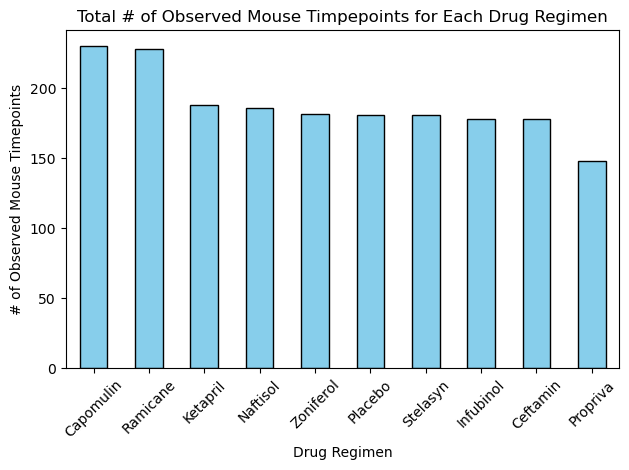

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Calculate the total number of rows for each drug regimen
drug_regimen_counts = clean_data["Drug Regimen"].value_counts()

# Create a bar plot
drug_regimen_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total # of Observed Mouse Timpepoints for Each Drug Regimen")

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


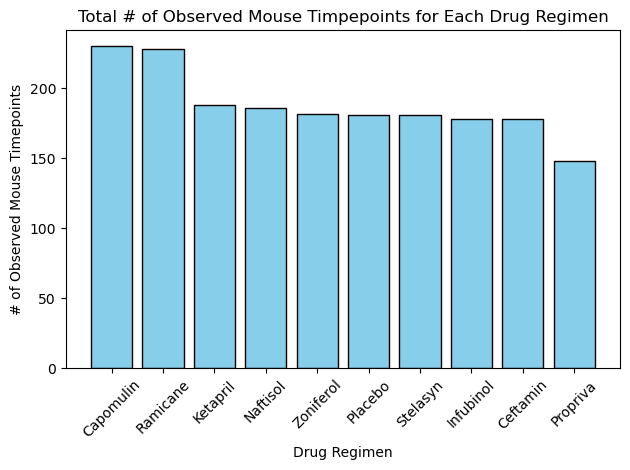

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Extract drug regimen names and their corresponding counts
drug_regimens = drug_regimen_counts.index
counts = drug_regimen_counts.values

# Create a bar plot using pyplot
plt.bar(drug_regimens, counts, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total # of Observed Mouse Timpepoints for Each Drug Regimen")


# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

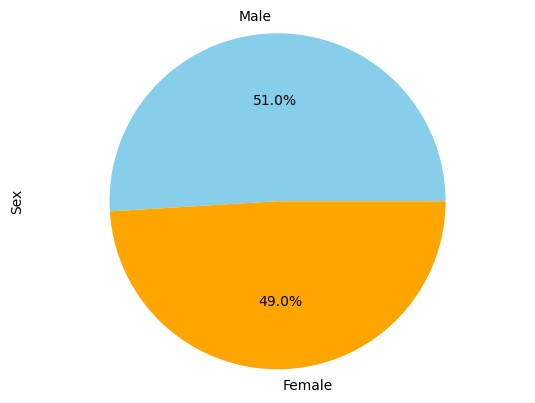

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Calculate the distribution of female versus male mice
sex_distribution = clean_data["Sex"].value_counts()

# Create a pie plot 

sex_distribution.plot(kind='pie', labels=sex_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'orange'])


# Show the plot
plt.axis('equal')  
plt.show()

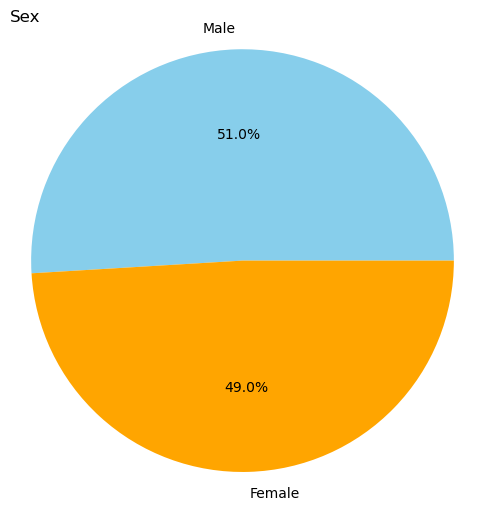

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(6, 6))  

# Set the size of the plot
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'orange'])

# Add title
plt.title("Sex", loc='left')

# Show the plot
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume_data = clean_data[clean_data["Drug Regimen"].isin(treatment_regimens)]

# Getting the last (greatest) timepoint for each mouse

final_timepoints = final_tumor_volume_data.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(final_timepoints, clean_data, on=["Mouse ID", "Timepoint"])


print(final_tumor_volumes[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]])                              

   Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0      a203    Infubinol         45           67.973419
1      a251    Infubinol         45           65.525743
2      a275     Ceftamin         45           62.999356
3      a411     Ramicane         45           38.407618
4      a444     Ramicane         45           43.047543
..      ...          ...        ...                 ...
95     y769     Ceftamin         45           68.594745
96     y793    Capomulin         45           31.896238
97     y865     Ceftamin         45           64.729837
98     z578     Ramicane         45           30.638696
99     z581    Infubinol         45           62.754451

[100 rows x 4 columns]


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

temp = {}
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in treatment_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    tumor_volume = final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    
    # add subset 
    
    tumor_vol_data.append(tumor_volume)

    # Determine outliers using upper and lower bounds
    
    quartiles = tumor_volume.quantile([0.25,0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    potential_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
   


    print(f"{regimen} potential outliers:")
    print(potential_outliers)




Capomulin potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers:
15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)


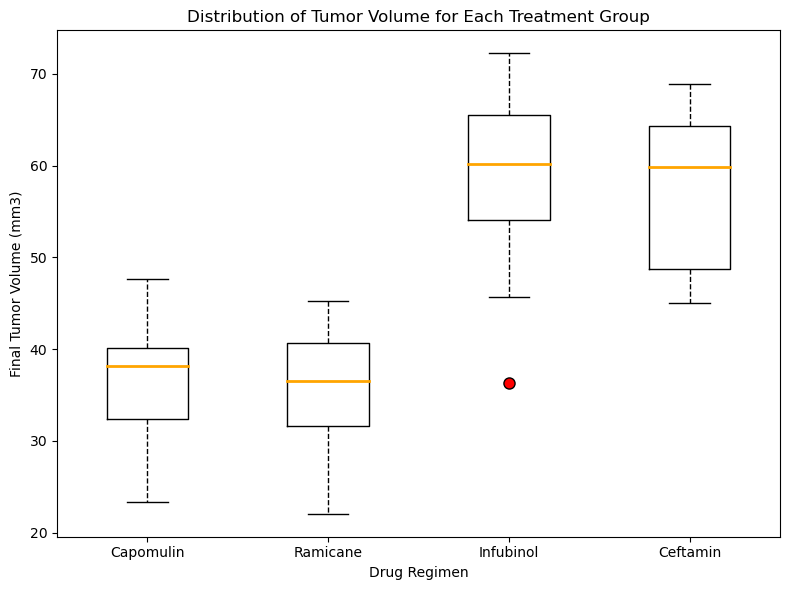

In [37]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create Box Plot

plt.figure(figsize=(8, 6))

# Customizing the boxplot appearance

boxplot_props = dict(whiskerprops=dict(color='black', linestyle='--'),
                     medianprops=dict(color='orange', linewidth=2),
                     flierprops=dict(marker='o', markerfacecolor='red', markersize=8, markeredgecolor='black'),
                     capprops=dict(color='black'))

# Generating the box plot for each treatment regimen

plt.boxplot(tumor_vol_data, labels=treatment_regimens, showfliers=True, **boxplot_props)

# Adding labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume for Each Treatment Group")

# Show the plot
plt.tight_layout()
plt.show()

## Line and Scatter Plots

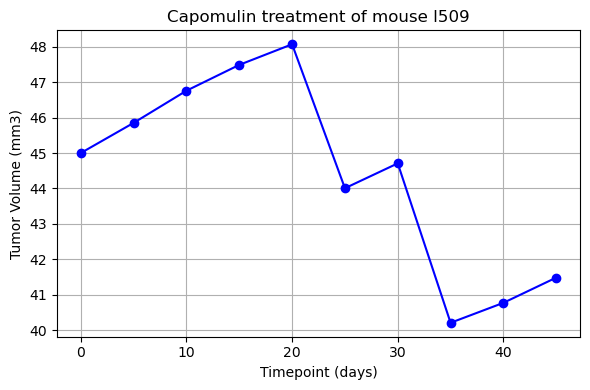

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for mice treated with Capomulin

capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Select a single mouse ID (replace "mouse_id" with the actual Mouse ID you want to plot)

selected_mouse_id = "l509"
selected_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == selected_mouse_id]

# Generate the line plot of tumor volume vs. time point for the selected mouse

plt.figure(figsize=(6, 4))

# Plotting the data

plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"], marker='o', color='blue')

# Adding labels and title

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of mouse {selected_mouse_id}")

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()

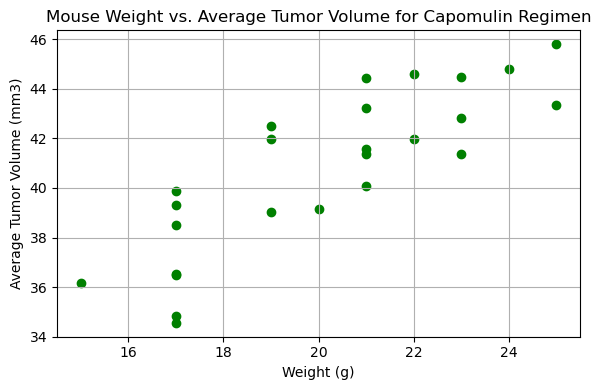

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Group the Capomulin data by mouse weight and calculate the average tumor volume

avg_tumor_volume_by_weight = capomulin_data.groupby("Mouse ID")[["Tumor Volume (mm3)","Weight (g)"]].mean().reset_index()

# Generate the scatter plot of mouse weight vs. average tumor volume

plt.figure(figsize=(6, 4))

# Plotting the data

plt.scatter(avg_tumor_volume_by_weight["Weight (g)"], avg_tumor_volume_by_weight["Tumor Volume (mm3)"], color='green', marker='o')

# Adding labels and title

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

# Show the plot

plt.tight_layout()
plt.grid(True)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


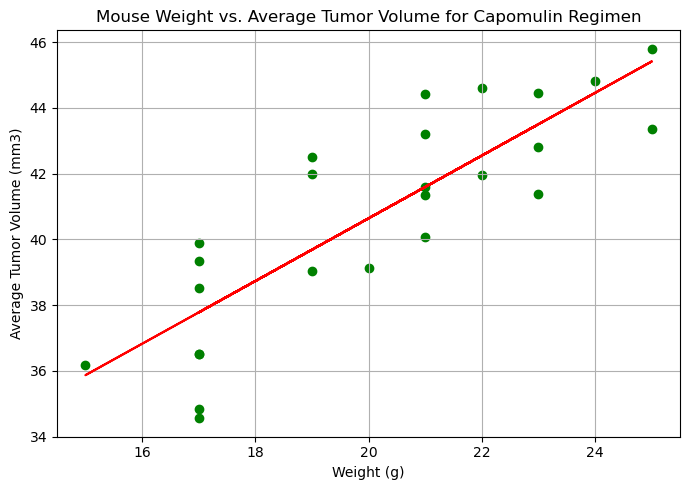

In [40]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient between mouse weight and average tumor volume

correlation_coefficient = st.pearsonr(avg_tumor_volume_by_weight["Weight (g)"], avg_tumor_volume_by_weight["Tumor Volume (mm3)"])[0]
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

# Perform linear regression model

slope, intercept, r_value, p_value, std_err = st.linregress(avg_tumor_volume_by_weight["Weight (g)"], avg_tumor_volume_by_weight["Tumor Volume (mm3)"])

# Generate the scatter plot of mouse weight vs. average tumor volume

plt.figure(figsize=(7, 5))

# Plotting the data

plt.scatter(avg_tumor_volume_by_weight["Weight (g)"], avg_tumor_volume_by_weight["Tumor Volume (mm3)"], color='green', marker='o')

# Adding the linear regression line to the plot

plt.plot(avg_tumor_volume_by_weight["Weight (g)"], slope * avg_tumor_volume_by_weight["Weight (g)"] + intercept, color='red')

# Adding labels and title

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")


# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()
